# MAP 568 Project

Maxime Vincent & Swann Chelly

In [1]:
import numpy as np

from constant import *
from scipy import *
from scipy import stats
from pylab import *     
from scipy.integrate import odeint # Module de résolution des équations différentielles
import plotly as po
from progressbar import ProgressBar
import matplotlib.pyplot as plt

## Incertitudes en sortie

1) **Programmer la résolution du système (1-10).**

Dans le fichier constant nous définissons l'ensemble des constantes. La fonction `init_constant` de ce fichier renvoie un dictionnaire généré aléatoirement de constantes. 

In [23]:
## Résolution de l'équation différentielle. 

def equa_diff(syst,temps,variables, constants):
    
    """
    La résolution du système d'équation différentiel (1-10) se fait grace au module odeint de scipy.integrate.
    
    Paramètres :
    ------------
    
    syst : 
    
    temps : 
    
    Sorties : 
    ---------
    Ensemble des paramètres du système différentiel. 
    
    """
    #temps = round(temps,1)
    #if temps == 50:
    #    temps = 50.1
    #elif temps > 100.:
    #    temps = 100.
    #i = time.index(temps)
    
    if type(variables)!= dict:
        variables = dict(zip(variables_keys,variables))
        constants = dict(zip(constants_keys, constants))
    else : 
        variables = variables
        constants = constants
    
    
    tau = constants['tau_0']*np.exp(-variables['mu']*max(temps-variables['N'],0))
    S = syst[0] 
    I_moins = syst[1] 
    I_plus = syst[2] 
    R_moins = syst[3] 
    R_plus_I = syst[4] 
    H = syst[5] 
    U = syst[6] 
    R_plus_H = syst[7] 
    D = syst[8] 
    D_R = syst[9]
    # Dérivées des variables
    DS = -tau*S*I_moins
    DI_moins = tau*S*I_moins-variables['lambda_1']*I_moins-(constants['gamma_IR']+constants['gamma_IH']+constants['gamma_IU'])*I_moins
    DI_plus = variables['lambda_1']*I_moins-(constants['gamma_IR']+constants['gamma_IH']+constants['gamma_IU'])*I_plus
    DR_moins = constants['gamma_IR']*I_moins
    DR_plus_I = constants['gamma_IR']*I_plus
    DH = constants['gamma_IH']*(I_moins + I_plus)-(constants['gamma_HR']+constants['gamma_HD']+constants['gamma_HU'])*H
    DU = constants['gamma_IU']*(I_moins + I_plus)+constants['gamma_HU']*H-(constants['gamma_UR'] + constants['gamma_UD'])*U
    DR_plus_H = constants['gamma_HR']*H+constants['gamma_UR']*U
    DD =constants['gamma_UD']*U+constants['gamma_HD']*H  
    DD_R = (variables['lambda_1']+constants['gamma_IH']+constants['gamma_IU'])*I_moins-D_R
    
    
    return([DS,DI_moins,DI_plus,DR_moins,DR_plus_I,DH,DU,DR_plus_H,DD,DD_R])


In [3]:
def euler_one_step(S,I_moins,I_plus,R_moins,R_plus_I,H,U,R_plus_H,D,D_R,i,constants,variables, deltaT):
    S_1        = S-constants['tau'][i]*S*I_moins*deltaT
    I_moins_1  = I_moins + (constants['tau'][i]*S*I_moins-variables['lambda_1']*I_moins-(constants['gamma_IR']+constants['gamma_IH']+constants['gamma_IU'])*I_moins)*deltaT
    I_plus_1   = I_plus +(variables['lambda_1']*I_moins-(constants['gamma_IR']+constants['gamma_IH']+constants['gamma_IU'])*I_plus)*deltaT
    R_moins_1  = R_moins +(constants['gamma_IR']*I_moins)*deltaT
    R_plus_I_1 = R_plus_I + (constants['gamma_IR']*I_plus)*deltaT
    H_1        = H + (constants['gamma_IH']*(I_moins + I_plus)-(constants['gamma_HR']+constants['gamma_HD']+constants['gamma_HU'])*H)*deltaT
    U_1        = U + (constants['gamma_IU']*(I_moins + I_plus)+constants['gamma_HU']*H-(constants['gamma_UR'] + constants['gamma_UD'])*U)*deltaT
    R_plus_H_1 = R_plus_H+ (constants['gamma_HR']*H+constants['gamma_UR']*U)*deltaT
    D_1        = D + (constants['gamma_UD']*U+constants['gamma_HD']*H)*deltaT  
    D_R_1      = D_R +((variables['lambda_1']+constants['gamma_IH']+constants['gamma_IU'])*I_moins-D_R)*deltaT
    
    
    return(S_1,I_moins_1,I_plus_1,R_moins_1,R_plus_I_1,H_1,U_1,R_plus_H_1,D_1,D_R_1)


def resolution_systeme(deltaT,constants, variables, set_size = global_constants['set_size']):
    if type(variables)!= dict:
        variables = dict(zip(variables_keys,variables))
        constants = dict(zip(constants_keys, constants))
    else : 
        variables = variables
        constants = constants
    Res = np.zeros((10,set_size))
    Res[0,0] = global_constants['S_0']
    Res[1,0] = variables['I_moins_0']
    
    for i in range(1,set_size):
        Res[:,i] = euler_one_step(Res[0,i-1],Res[1,i-1],Res[2,i-1],Res[3,i-1],Res[4,i-1],Res[5,i-1],Res[6,i-1],Res[7,i-1],Res[8,i-1],Res[9,i-1],i,constants, variables, deltaT)
 
    return Res



[  4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103]
100


Text(0, 0.5, 'Nombre de personne en réanimation')

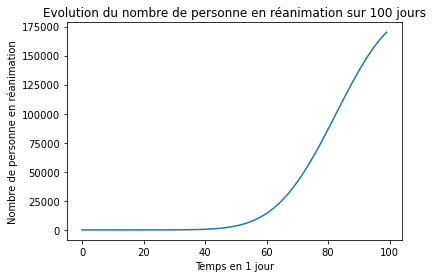

In [24]:
# Analyse des résultats

variables = init_variables()
constants = compute_constants(variables)


syst_CI=array([global_constants['S_0'],variables['I_moins_0'],0,0,0,0,0,0,0,0])
simulation=odeint(equa_diff,syst_CI,constants['t'], args = (variables,constants))
print(len(simulation))
plt.plot(simulation[::int(1/global_constants['deltaT']),6])
plt.title(f"Evolution du nombre de personne en réanimation sur {global_constants['T_MAX']} jours")
plt.xlabel(f"Temps en {global_constants['deltaT']} jour")
plt.ylabel("Nombre de personne en réanimation")



2) **Par échantillonnage Monte Carlo (en utilisant les lois des paramètres d'entrée de la table 1), donner :**
- la loi du nombre maximal de patients présents en soins intensifs (histogramme, moyenne, quantiles à 10% et 90%),
- la loi de la date du pic de l'épidémie.

In [10]:
## Implémentation de la méthode de Monte Carlo classique pour la résolution du système différentiel. 

M = 10000

def Monte_Carlo(M, methode):
    """
    Echantillonage de Monte Carlo 
    
    Paramètres : 
    ------------
    
    M : int, 
        Taille de l'échantillon. 
    
    Sorties : 
    ---------
    peak_value  : list,
        Nombre de cas en réanimation au pic de l'épidémie pour chaque simulation.
    peak_day    : list, 
        Jour du pic pour chaque simulation.
    pos         : list, 
        Nombre de cas au pic de l'épidémie pour chaque simulation.
    
    """
    
    print(f"Echantillonnage de Monte Carlo sur {M} simulations")
    peak_value,peak_day, pos = [],[], []
    pbar = ProgressBar()
    for i in pbar(range(M)):
        if methode == 'odeint':
            variables = init_variables(deltaT=global_constants['deltaT'],global_constants = global_constants)
            constants = compute_constants(variables)
            syst_CI=array([global_constants['S_0'],variables['I_moins_0'],0,0,0,0,0,0,0,0])
            simulation=odeint(equa_diff,syst_CI,constants['t'], args = (variables,constants))      
            peak_value.append(np.max(simulation[:,6]))
            peak_day.append(int(np.argmax(list(simulation[:,6]))*global_constants['deltaT']))
            pos.append(np.max(simulation[:,1]))
        if methode == 'euler' :
            variables = init_variables(deltaT=global_constants['deltaT'],global_constants = global_constants)
            constants = compute_constants(variables)
            simulation = np.transpose(resolution_systeme(global_constants['deltaT'],constants, variables, set_size = global_constants['set_size']))
            #peak_value.append(np.max(simulation[6]))
            #peak_day.append(int(np.argmax(list(simulation[6]))*global_constants['deltaT']))
            #pos.append(np.max(simulation[1]))
            peak_value.append(np.max(simulation[:,6]))
            peak_day.append(int(np.argmax(list(simulation[:,6]))*global_constants['deltaT']))
            pos.append(np.max(simulation[:,1]))
        
    return (peak_value,peak_day,pos)

peak_value,peak_day,pos = Monte_Carlo(M, methode = 'odeint')

  0% (6 of 10000) |                      | Elapsed Time: 0:00:00 ETA:   0:03:04

Echantillonnage de Monte Carlo sur 10000 simulations


100% (10000 of 10000) |##################| Elapsed Time: 0:01:53 Time:  0:01:53


10000

La valeur moyenne du pic est de 31287.91 et appartient à l'intervalle de confiance à 95% suivant : [29922.82,32652.99] 
 Le quantile à 10% du pic de réanimation est : 41.30475783322165
 Le quantile à 90% du pic de réanimation est : 99435.26376031176


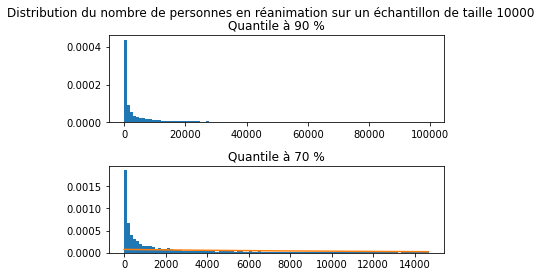

In [12]:
mean_value = np.mean(peak_value)
var_value  = np.var(peak_value)
q_10 = np.quantile(peak_value, 0.1, axis = None)
q_70 = np.quantile(peak_value, 0.7, axis = None)
q_90 = np.quantile(peak_value, 0.9, axis = None)
print(f"La valeur moyenne du pic est de {round(mean_value,2)} et appartient à l'intervalle de confiance à 95% suivant : [{max(0,round(mean_value-1.96*np.sqrt(var_value/M),2))},{round(mean_value+1.96*np.sqrt(var_value/M),2)}] ")
print(f" Le quantile à 10% du pic de réanimation est : {q_10}")
print(f" Le quantile à 90% du pic de réanimation est : {q_90}")

# Compte tenu de la valeur du quantile à 90% nous tronquons donc la liste par soucis de visibilité. 


fig, axs = plt.subplots(2)
fig.suptitle(f"Distribution du nombre de personnes en réanimation sur un échantillon de taille {M}")
axs[0].hist([value for value in peak_value if value < q_90], bins = 100, density = 1)
axs[0].set_title('Quantile à 90 %')
axs[1].hist([value for value in peak_value if value < q_70], bins = 100, density = True)
axs[1].set_title('Quantile à 70 %')
x=np.arange(0,max([value for value in peak_value if (value < q_70)]), 0.01)
Moy = np.mean([value for value in peak_value if ( value > q_10 and value < q_90)])
Median = np.median([value for value in peak_value if (value < q_70)])
axs[1].plot(x,stats.expon.pdf(x, scale=Moy), label="densité") 
plt.subplots_adjust(hspace=0.5)

En supposant que la distribution du nombre de cas en réanimation au pic de l'épidémie suis une loie exponentielle, nous pouvons donner son paramètre $\lambda = \frac{1}{\mathbb{\hat{E}}(X)}$ où $X$ correspond à la variable aléatoire liée au nombre de cas en réanimation au pic de l'épidémie. Nous la notrons ici `lbd`.


4.9527887785471895e-05


(array([1.92999195e+04, 1.70003546e+04, 1.47829170e+04, 1.43558550e+04,
        1.14156971e+04, 1.02002128e+04, 9.26396135e+03, 7.55571316e+03,
        6.63588721e+03, 6.24167609e+03, 5.40397745e+03, 5.46967931e+03,
        3.90926029e+03, 3.90926029e+03, 3.18653990e+03, 2.85803063e+03,
        2.71020146e+03, 2.74305239e+03, 2.26671395e+03, 1.85607736e+03,
        1.79037551e+03, 1.44544078e+03, 1.24833522e+03, 8.70549559e+02,
        9.36251413e+02, 9.03400486e+02, 7.06294926e+02, 7.39145852e+02,
        4.27062048e+02, 5.25614828e+02, 3.94211121e+02, 4.10636585e+02,
        4.27062048e+02, 1.80680097e+02, 2.79232878e+02, 2.79232878e+02,
        2.46381951e+02, 1.97105561e+02, 6.57018535e+01, 1.14978244e+02,
        1.80680097e+02, 6.57018535e+01, 6.57018535e+01, 4.92763902e+01,
        6.57018535e+01, 3.28509268e+01, 8.21273169e+01, 6.57018535e+01,
        6.57018535e+01, 6.57018535e+01, 0.00000000e+00, 1.64254634e+01,
        4.92763902e+01, 1.64254634e+01, 0.00000000e+00, 1.642546

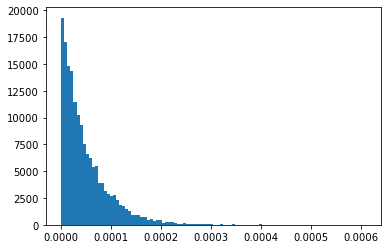

In [9]:
lbd = 1/mean_value
print(lbd)
Y = np.random.exponential(lbd,10000)
plt.hist(Y,bins = 100,density = True)

La valeur moyenne du pic est de 9.0 et appartient à l'intervalle de confiance à 95% suivant : [9.0,9.0] 
 Le quantile à 10% du pic de réanimation est : 9.0
 Le quantile à 90% du pic de réanimation est : 9.0


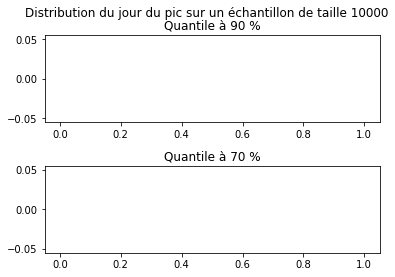

In [13]:
# Loi de la date de l'épidémie. 

mean_day = np.mean(peak_day)
var_day  = np.var(peak_day)
q_10_day = np.quantile(peak_day, 0.1, axis = None)
q_70_day = np.quantile(peak_day, 0.7, axis = None)
q_90_day = np.quantile(peak_day, 0.9, axis = None)
print(f"La valeur moyenne du pic est de {round(mean_day,2)} et appartient à l'intervalle de confiance à 95% suivant : [{max(0,round(mean_day-1.96*np.sqrt(var_day/M),2))},{round(mean_day+1.96*np.sqrt(var_day/M),2)}] ")
print(f" Le quantile à 10% du pic de réanimation est : {q_10_day}")
print(f" Le quantile à 90% du pic de réanimation est : {q_90_day}")

# Compte tenu de la valeur du quantile à 90% nous tronquons donc la liste par soucis de visibilité. 

fig, axs = plt.subplots(2)
fig.suptitle(f"Distribution du jour du pic sur un échantillon de taille {M}")
axs[0].hist([day for day in peak_day if day < q_90_day], bins = 30)
axs[0].set_title('Quantile à 90 %')
axs[1].hist([day for day in peak_day if day < q_70_day], bins = 30)
axs[1].set_title('Quantile à 70 %')
plt.subplots_adjust(hspace=0.5)

# Analyse de sensibilité qualitative : Criblage

In [14]:
def Morris(R,eps):
    """
    Echantillonage de Monte Carlo 
    
    Paramètres : 
    ------------
    
    R : int, 
        Taille de l'échantillon.
    eps : float,
        paramètre pour évaluer nos différences finies (f(x+eps)-f(x))/eps
    
    Sorties : 
    ---------
    moyenne_grad_peak_value  : array,
        Moyenne du gradient du nombre réanimation au pic de l'épidémie pour chaque simulation.
    moyenne_grad_peak_day    : array, 
        Moyenne du gradient du Jour du pic pour chaque simulation.
    sigma_grad_peak_value  : array,
        Ecart-type du gradient du nombre réanimation au pic de l'épidémie pour chaque simulation.
    sigma_Moyenne_grad_peak_day    : array, 
        Ecart-type du gradient du Jour du pic pour chaque simulation.
    
    """
    
    print(f"Calcul de sensibilité")
    grad_peak_value,grad_peak_day = [],[]
    pbar = ProgressBar()
    for i in pbar(range(R)):
        variables = init_variables()
        constants = compute_constants(variables)
        syst_CI=array([global_constants['S_0'],variables['I_moins_0'],0,0,0,0,0,0,0,0])
        simulation_ref=odeint(equa_diff,syst_CI,constants['t'], args = (variables,constants))
        peak_value_ref = np.max(simulation_ref[:,6])
        peak_day_ref = int(np.argmax(list(simulation_ref[:,6]))*global_constants['deltaT'])
        d_peak_value, d_peak_day = [], []
    
        for key, value in variables.items():
            sauvegarde = variables[key]
            variables[key] = sauvegarde +eps
            constants = compute_constants(variables)
            simulation= odeint(equa_diff,syst_CI,constants['t'], args = (variables,constants))
            peak_value = np.max(simulation[:,6])
            peak_day = int(np.argmax(list(simulation[:,6]))*global_constants['deltaT'])
            d_peak_value.append((peak_value-peak_value_ref)/eps)
            d_peak_day.append((peak_day-peak_day_ref)/eps)
            variables[key] = sauvegarde
        
        grad_peak_value += [d_peak_value]
        grad_peak_day += [d_peak_day]
        
    grad_peak_value, grad_peak_day = np.abs(np.array(grad_peak_value)), np.abs(np.array(grad_peak_day))
     
    moyenne_grad_peak_value = np.mean(grad_peak_value, axis=0)
    moyenne_grad_peak_day = np.mean(grad_peak_day, axis=0)
    sigma_grad_peak_value = np.sqrt(np.var(grad_peak_value, axis=0))
    sigma_grad_peak_day = np.sqrt(np.var(grad_peak_day, axis=0))
    
    return( moyenne_grad_peak_value,  moyenne_grad_peak_day, sigma_grad_peak_value, sigma_grad_peak_day )
        

R=100
eps = 10**(-4)
moyenne_grad_peak_value,  moyenne_grad_peak_day, sigma_grad_peak_value, sigma_grad_peak_day = Morris(R, eps)

Calcul de sensibilité


KeyboardInterrupt: 

In [9]:
print(moyenne_grad_peak_value)
print(moyenne_grad_peak_day)
print(sigma_grad_peak_value)
print(sigma_grad_peak_day)

[4.19905680e+04 6.54428652e+04 5.62246061e+05 2.14991970e-01
 5.12549068e+04 2.64866143e-02 4.63938045e+04 1.26875692e+06
 7.91285798e+05 3.52350880e+03 1.76222658e+03 1.06202455e+04
 2.08075196e+02 9.26004823e+02 0.00000000e+00]
[  0.   0. 200.   0.   0.   0.   0. 600.   0.   0.   0.   0.   0.   0.
   0.]
[1.15120797e+05 2.09462609e+05 1.65119525e+06 1.55317518e+00
 1.70041629e+05 1.76690051e-01 1.13022113e+05 4.06201464e+06
 1.92083228e+06 8.82828310e+03 4.41479737e+03 2.73288989e+04
 7.42636394e+02 2.66952741e+03 0.00000000e+00]
[   0.            0.         1400.            0.            0.
    0.            0.         2374.86841741    0.            0.
    0.            0.            0.            0.            0.        ]


#### analyse des résultats : ...

## Criblage avec SALib

In [7]:
from SALib.analyze import morris
from SALib.sample import morris as sample_morris

In [14]:
problem = {
    'num_vars': 15,
    'names': ['p_a','p_IH','p_IU','p_HD','p_HU','p_UD','R_0','mu','lambda_1','t_0','N','N_I','N_H','N_U','I_moins_0'],
    'bounds': [[0.4,0.9],[0.05,0.2],[0.01,0.04],[0.1,0.2],[0.1,0.2],[0.2,0.4],[2.9,3.4],[0.01,0.08],[10**(-4),10**(-3)],[0,30],[30,50],
[8,12],[15,25],[10,20],[1,100]]
}


def Resolution(parametres):
    peak_value = np.zeros(len(parametres))
    peak_day = np.zeros(len(parametres))
    
    for i, X in enumerate(parametres):
    
        if type(X)!= dict:
            variables = dict(zip(variables_keys,X))
            #constants = dict(zip(constants_keys, constants))
        else : 
            variables = X
        constants = compute_constants(variables)   
        syst_CI=array([global_constants['S_0'],variables['I_moins_0'],0,0,0,0,0,0,0,0])
        #solution=odeint(equa_diff,syst_CI,constants['t'], args = (variables,constants))
        simulation = np.transpose(resolution_systeme(global_constants['deltaT'],constants, variables, set_size = global_constants['set_size']))
        peak_value[i]=np.max(simulation[:,6])
        peak_day[i]=int(np.argmax(list(simulation[:,6]))*global_constants['deltaT'])
    return(peak_value, peak_day)



In [16]:
X = sample_morris.sample(problem, 100, num_levels=4)
peak_value, peak_day = Resolution(X)
Smorris_value = morris.analyze(problem, X, peak_value, conf_level=0.95,print_to_console=True, num_levels=4)
Smorris_day = morris.analyze(problem, X, peak_day, conf_level=0.95,print_to_console=True, num_levels=4)

Parameter                         Mu_Star         Mu    Mu_Star_Conf      Sigma
p_a                             52202.216 -52202.216       22007.431 117630.675
p_IH                            14001.897  14001.897        5499.338  29219.938
p_IU                            32288.187  32288.187       12264.156  66709.151
p_HD                                0.000      0.000           0.000      0.000
p_HU                             7799.560   7799.560        4310.155  23300.510
p_UD                                0.000      0.000           0.000      0.000
R_0                             29194.326  29194.326       13122.559  66955.032
mu                              85561.301 -85561.301       28232.465 153636.210
lambda_1                         1584.141   1584.141         660.162   3022.849
t_0                             60349.061 -60349.061       18773.148 101808.060
N                               42381.589  42381.589       14160.588  69483.097
N_I                             64282.95

# Analyse de sensibilité quantitative : Sobol

In [18]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
from pylab import *
from scipy.integrate import odeint

In [19]:
param_values = saltelli.sample(problem, 100, calc_second_order=True)
peak_value, peak_day = Resolution(param_values)
#Si_peak_value = sobol.analyze(problem, peak_value, print_to_console=True)
#Si_peak_day = sobol.analyze(problem, peak_day, print_to_console=True)

In [21]:
peak_value

array([  245.40462599,   207.75538072,   307.22349192, ...,
       11310.95287985,  6146.93765399,  7439.68215734])

In [20]:
pa =[]
pih =[]
piu =[]
phd =[]
phu =[]
pud =[]
Ni =[]
Nh =[]
Nu =[]
R0 =[]
mu =[]
N =[]
t0 =[]
I0moins =[]
lambda1 =[]
pat =[]
piht =[]
piut =[]
phdt =[]
phut =[]
pudt =[]
Nit =[]
Nht =[]
Nut =[]
R0t =[]
mut =[]
Nt =[]
t0t =[]
I0moinst =[]
lambda1t =[]
for i in range(len(H[0])):
    h = H[:,i]
    Si_H = sobol.analyze(problem,h)
    pa.append(Si_H['S1'][0])
    pih.append(Si_H['S1'][1])
    piu.append(Si_H['S1'][2])
    phd.append(Si_H['S1'][3])
    phu.append(Si_H['S1'][4])
    pud.append(Si_H['S1'][5])
    Ni.append(Si_H['S1'][6])
    Nh.append(Si_H['S1'][7])
    Nu.append(Si_H['S1'][8])
    R0.append(Si_H['S1'][9])
    mu.append(Si_H['S1'][10])
    N.append(Si_H['S1'][11])
    t0.append(Si_H['S1'][12])
    I0moins.append(Si_H['S1'][13])
    lambda1.append(Si_H['S1'][14])

TypeError: object of type 'numpy.float64' has no len()

In [ ]:
pat.append(Si_H['ST'][0])
    piht.append(Si_H['ST'][1])
    piut.append(Si_H['ST'][2])
    phdt.append(Si_H['ST'][3])
    phut.append(Si_H['ST'][4])
    pudt.append(Si_H['ST'][5])
    Nit.append(Si_H['ST'][6])
    Nht.append(Si_H['ST'][7])
    Nut.append(Si_H['ST'][8])
    R0t.append(Si_H['ST'][9])
    mut.append(Si_H['ST'][10])
    Nt.append(Si_H['ST'][11])
    t0t.append(Si_H['ST'][12])
    I0moinst.append(Si_H['ST'][13])
    lambda1t.append(Si_H['ST'][14])

In [ ]:
plt.plot(periode,pa,label='pa')
plt.plot(periode,pih,label='pih')
plt.plot(periode,piu,label='piu')
plt.plot(periode,phd,label='phd')
plt.plot(periode,phu,label='phu')
plt.plot(periode,pud,label='pud')
plt.plot(periode,Ni,label='Ni')
plt.plot(periode,Nh,label='Nh')
plt.plot(periode,Nu,label='Nu')
plt.plot(periode,R0,label='R0')
plt.plot(periode,mu,label='mu')
plt.plot(periode,N,label='N')
plt.plot(periode,t0,label='t0')
plt.plot(periode,I0moins,label='I0moins')
plt.plot(periode,lambda1,label='lambda1')
plt.title('Evolution pour H des indices de premier ordre sur la péride du jeu de données')
plt.legend(loc='upper left', fontsize='x-small')
plt.show()

In [ ]:
plt.plot(periode,pat,label='pa')
plt.plot(periode,piht,label='pih')
plt.plot(periode,piut,label='piu')
plt.plot(periode,phdt,label='phd')
plt.plot(periode,phut,label='phu')
plt.plot(periode,pudt,label='pud')
plt.plot(periode,Nit,label='Ni')
plt.plot(periode,Nht,label='Nh')
plt.plot(periode,Nut,label='Nu')
plt.plot(periode,R0t,label='R0')
plt.plot(periode,mut,label='mu')
plt.plot(periode,Nt,label='N')
plt.plot(periode,t0t,label='t0')
plt.plot(periode,I0moinst,label='I0moins')
plt.plot(periode,lambda1t,label='lambda1')
plt.title('Evolution pour H des indices totaux sur la péride du jeu de données')
plt.legend(loc='upper left', fontsize='x-small')
plt.show()

# Calibration

In [5]:
import pandas as pd
import matplotlib.dates as mdates
from matplotlib import ticker

In [6]:

contamination = pd.read_csv('data_per_day.csv', sep = ';')
contamination.columns = [jour,'detecte']
contamination[jour] = pd.to_datetime(contamination[jour],infer_datetime_format = True)
contamination = contamination[contamination[jour]<= '2020-05-11']
contamination['detecte'] = contamination['detecte'].diff(periods = 1)

 
hosp          = pd.read_csv('donnees_hospitalieres.csv', ';')
hosp[jour]    = pd.to_datetime(hosp[jour])
hosp          = hosp.groupby(jour).agg('sum').reset_index(False)[[jour,'hosp','rea','rad','dc']]
big_table     = hosp.merge(contamination, left_on= jour, right_on = jour)
big_table     = big_table[big_table[jour]<= '2020-05-11']
big_table.head()   

,jour,hosp,rea,rad,dc,detecte
0,2020-03-18,5905,1535,1627,435,1404.0
1,2020-03-19,7961,1975,2322,642,1861.0
2,2020-03-20,10272,2564,3128,890,1617.0
3,2020-03-21,11599,2872,3580,1041,1847.0
4,2020-03-22,13675,3311,4188,1251,1559.0


Text(0.5, 1.0, 'Spread of the epidemic')

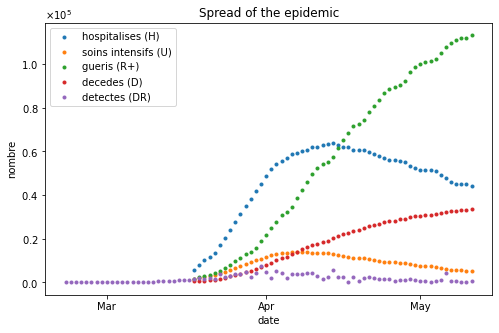

In [7]:
columns = ['hosp','rea','rad','dc']
titles  = {'hosp': 'hospitalises (H)', 'rea': 'soins intensifs (U)', 'dc' : 'decedes (D)', 'detecte' : 'detectes (DR)', 'rad' : 'gueris (R+)'}

fig, axs = plt.subplots(figsize = (8,5), nrows = 1, ncols = 1)
for i,col in enumerate(columns) : 
    axs.scatter(big_table[jour],big_table[col],marker = '.', label = titles[col])
axs.scatter(contamination[jour],contamination['detecte'], marker = '.', label = titles['detecte'])
axs.legend()
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)


formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1))
axs.yaxis.set_major_formatter(formatter) 
axs.set_ylabel('nombre')
axs.set_xlabel('date')
axs.format_xdata = mdates.DateFormatter('%Y-%m-%d')
axs.set_title('Spread of the epidemic')

# Calibration déterministe

Pour répondre à cette question, nous lançons la fonction `minimize` de scipy.optimize 100 fois et nous gardons uniquement le 15-uplets de valeurs qui minimise le plus fortement la fonction objectif.

Une telle démarche a nécessairement un coût de calcul assez fort et nous sauvons donc le tout dans un excel fournit avec le jupyter. Afin de pouvoir générer les variables veuillez mettre `generate_variables` à la valeur `True`. Autrement, les variables seront importées depuis le fichier CSV en question. 

In [18]:
from scipy.optimize import minimize
generate_variables = False

In [19]:
# Table pre-processing
contamination = contamination[('2020-02-25' <= contamination[jour])& (contamination[jour]<= '2020-03-31')]
big_table     = big_table[big_table[jour]<= '2020-03-31']
sigmas        = [1,1,1,1,1]
print(global_constants['deltaT'])

0.1


In [44]:

def Epsilon(variables,constants,contamination = contamination,big_table=big_table,global_constants=global_constants, sigmas = sigmas,n_DR=n_DR,n_H=n_H):
    """
    parameters will be a dictionnary similar to the one resulting from init_constant    
    """
    
    syst_CI=array([global_constants['S_0'],variables[-1],0,0,0,0,0,0,0,0])
    #simulation=odeint(equa_diff,syst_CI,constants[-2],args = (variables,constants))[::int(1/global_constants['deltaT'])]
    simulation = np.transpose(resolution_systeme(global_constants['deltaT'],constants, variables, set_size = global_constants['set_size']))[::int(1/global_constants['deltaT'])]
            
    
    DR = ((simulation[n_DR:,-1]-contamination['detecte'].to_numpy())/np.sqrt(simulation[n_DR:,-1])/sigmas[0])**2
    
    H  = ((simulation[n_H:,5]-big_table['hosp'].to_numpy())/np.sqrt(simulation[n_H:,5])/sigmas[1])**2
    U  = ((simulation[n_H:,6]-big_table['rea'].to_numpy())/np.sqrt(simulation[n_H:,6])/sigmas[2])**2
    D  = ((simulation[n_H:,8]-big_table['dc'].to_numpy())/np.sqrt(simulation[n_H:,8])/sigmas[3])**2
    R  = ((simulation[n_H:,7]-big_table['rad'].to_numpy())/np.sqrt(simulation[n_H:,7])/sigmas[4])**2
    return np.sum(DR) + np.sum(H+U+D+R)



In [25]:


def q_7_function():
    """
    This function compute the minimization routine one time and return the 15-uplet and the value of the objectiv function.    
    """
    variables = init_variables(T_MAX = 66)
    constants = compute_constants(variables, global_constants = global_constants)
    variables = list(variables.values())
    constants = list(constants.values())

    res = minimize(Epsilon,x0 = variables,bounds = bound, args = (constants))
    optimal_variables = dict(zip(variables_keys,res.x))
    return optimal_variables,res.fun

if generate_variables :     
    all_results = []
    all_variables = []
    pbar = ProgressBar()

    for i in pbar(range(100)):
        optimal_variables, res = q_7_function()
        all_results.append(res)
        all_variables.append(optimal_variables)
    
    best_variables = all_variables[np.argmin(all_results)]
    with open('best_variables_q7.csv', 'w') as f:
        f.write("%s,%s\n"%('variables','values'))
        for key in best_variables.keys():
            f.write("%s,%s\n"%(key,best_variables[key]))
    
    
else : 
    best_variables = pd.read_csv('best_variables_q7.csv', ',')
    best_variables = best_variables['values'].to_numpy()
    best_variables = dict(zip(variables_keys,best_variables))
    

In [26]:

constants  = compute_constants(best_variables)
syst_CI    = array([global_constants['S_0'],best_variables['I_moins_0'],0,0,0,0,0,0,0,0])
#simulation = odeint(equa_diff,syst_CI,constants['t'], args = (best_variables,constants))[::10]
simulation = np.transpose(resolution_systeme(global_constants['deltaT'],constants, variables, set_size = global_constants['set_size']))[::10]

100


Text(0.5, 1.0, 'Spread of the epidemic')

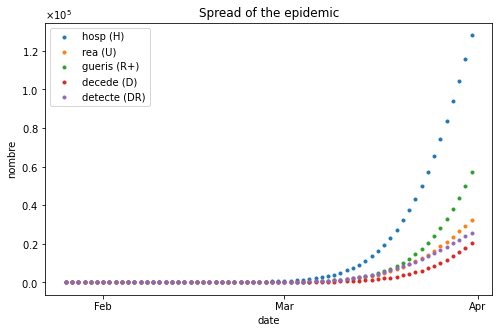

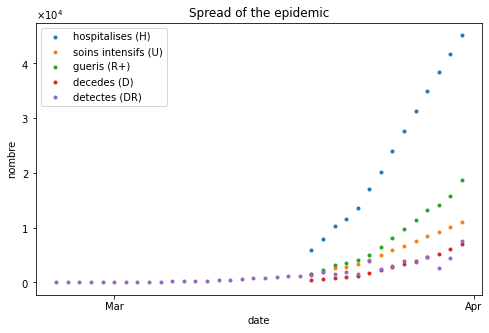

In [27]:
fig, axs = plt.subplots(figsize = (8,5), nrows = 1, ncols = 1)
columns  = [5,6,7,8,9]
titles   = {'5':'hosp (H)','6': 'rea (U)','8':'decede (D)', '9':'detecte (DR)','7': 'gueris (R+)'}
time     = pd.date_range(start =  '2020-01-26', end = '2020-03-31', freq = 'D')

print(len(simulation))
for i,col in enumerate(columns) : 
    axs.scatter(time,simulation[:66,col],marker = '.', label = titles[f"{col}"])
axs.legend()
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)


formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1))
axs.yaxis.set_major_formatter(formatter) 
axs.set_ylabel('nombre')
axs.set_xlabel('date')
axs.format_xdata = mdates.DateFormatter('%Y-%m-%d')
axs.set_title('Spread of the epidemic')



columns = ['hosp','rea','rad','dc']
titles  = {'hosp': 'hospitalises (H)', 'rea': 'soins intensifs (U)', 'dc' : 'decedes (D)', 'detecte' : 'detectes (DR)', 'rad' : 'gueris (R+)'}

fig, axs = plt.subplots(figsize = (8,5), nrows = 1, ncols = 1)
for i,col in enumerate(columns) : 
    axs.scatter(big_table[jour],big_table[col],marker = '.', label = titles[col])
axs.scatter(contamination[jour],contamination['detecte'], marker = '.', label = titles['detecte'])
axs.legend()
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)


formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1))
axs.yaxis.set_major_formatter(formatter) 
axs.set_ylabel('nombre')
axs.set_xlabel('date')
axs.format_xdata = mdates.DateFormatter('%Y-%m-%d')
axs.set_title('Spread of the epidemic')

8) **Donnez les valeurs de $\sigma_C$ pour $C$ dans $\{H,U,D,R\}$**

L'énoncé nous dit que : 

$\begin{equation}
p(data|x,\sigma)=(2\pi)^{-\frac{n_{DR}}{2}-2n_{H}}\sigma_{DR}^{-n_{DR}}\sigma_{H}^{-n_{H}}\sigma_{U}^{-n_{H}}\sigma_{D}^{-n_{H}}\sigma_{R}^{-n_{H}}\times e^{-\frac{1}{2}\sum_{i=1}^{n_{DR}}\frac{f_{DR}(x,s_{i})^{2}}{\sigma_{DR}^{2}}-\frac{1}{2}\sum_{i=1}^{n_{H}}\frac{f_{H}(x,s_{i})2}{\sigma_{H}^{2}}+\frac{f_{U}(x,s_{i})^{2}}{\sigma_{U}^{2}}+\frac{f_{D}(x,s_{i})^{2}}{\sigma_{D}^{2}}+\frac{f_{R}(x,s_{i})^{2}}{\sigma_{R}^{2}}}
\end{equation}$

Que l'on peut réécrire de la manière suivante afin de d'utiliser une optimisation sous log-vraisemblance par la suite : 

$\begin{equation}
p(data|x,\sigma)=(2\pi)^{-\frac{n_{DR}}{2}-2n_{H}}\sigma_{H}^{-n_{H}}\sigma_{U}^{-n_{H}}\sigma_{D}^{-n_{H}}\sigma_{R}^{-n_{H}}\times e^{-n_{DR}ln(\sigma_{DR})-\frac{1}{2}\sum_{i=1}^{n_{DR}}\frac{f_{DR}(x,s_{i})^{2}}{\sigma_{DR}^{2}}-\frac{1}{2}\sum_{i=1}^{n_{H}}\frac{f_{H}(x,s_{i})2}{\sigma_{H}^{2}}+\frac{f_{U}(x,s_{i})^{2}}{\sigma_{U}^{2}}+\frac{f_{D}(x,s_{i})^{2}}{\sigma_{D}^{2}}+\frac{f_{R}(x,s_{i})^{2}}{\sigma_{R}^{2}}}
\end{equation}$


On atteint un optimum pour l'expression suivante quand toutes les compostantes du gradient sont nulles. En raisonnant pour $\sigma_{DR}$ on a : 

$\begin{align}
\frac{\partial}{\sigma_{DR}}p(data|x,\sigma)&=(2\pi)^{-\frac{n_{DR}}{2}-2n_{H}}\sigma_{H}^{-n_{H}}\sigma_{U}^{-n_{H}}\sigma_{D}^{-n_{H}}\sigma_{R}^{-n_{H}}\times(-\frac{n_{DR}}{\sigma_{DR}}+\sum_{i=1}^{n_{DR}}\frac{f_{DR}(x,s_{i})^{2}}{\sigma_{DR}^{3}})e^{-n_{DR}ln(\sigma_{DR})-\frac{1}{2}\sum_{i=1}^{n_{DR}}\frac{f_{DR}(x,s_{i})^{2}}{\sigma_{DR}^{2}}-\frac{1}{2}\sum_{i=1}^{n_{H}}\frac{f_{H}(x,s_{i})2}{\sigma_{H}^{2}}+\frac{f_{U}(x,s_{i})^{2}}{\sigma_{U}^{2}}+\frac{f_{D}(x,s_{i})^{2}}{\sigma_{D}^{2}}+\frac{f_{R}(x,s_{i})^{2}}{\sigma_{R}^{2}}}\\
&=0
\end{align}$
Ce qui revient à écrire que : 


$\begin{align}
& \ \frac{n_{DR}}{\sigma_{DR}}=\sum_{i=1}^{n_{DR}}\frac{f_{DR}(x,s_{i})^{2}}{\sigma_{DR}^{3}}\\
\Leftrightarrow &  \ \sigma_{DR}^{2}=\sum_{i=1}^{n_{DR}}\frac{f_{DR}(x,s_{i})^{2}}{n_{DR}}
\end{align}$

En raisonnant de même pour les autres sigmas, il vient que :

$\sigma_{C}^{2}=\sum_{i=1}^{n_{H}}\frac{f_{C}(x,s_{i})^{2}}{n_{H}}$



9) **Donner une expression implicite de la loi a posteriori $p(x|data)$ des paramètres x.**

Le théorème de Bayes nous donne que : $p(x|data) \propto p(data|x)p_0(x)$.

Pour l'approche plug-in, on fixe les valeurs de sigma tel que définis à la question 8. Dans ce cas, on a : 

$\begin{equation}
p(x|data)=p(data|x)p_0(x)
\end{equation}$

Dans le cadre de l'approche full-bayésienne comme on a : $\pi(\sigma_C)=(\sigma_C)^{-1}$ pour $C$ dans $\{H,U,D,R\}$ alors on peut écrire que : $\begin{align}
p(x|data) &\propto \int_{\sigma}p(x,\sigma|data)d\sigma\\
&\propto \int_{\sigma}p(data|x,\sigma)p(\sigma)p_0(x)d\sigma
\end{align}$

En utilisant les expressions de chacun des $\sigma$ on peut développer l'intégrale et donner une expression implicite de cette densité. 


10) **Dans le cas plug-in, puis dans le cas full-bayésien, comparer les lois a priori et a posteriori uni-dimensionnelles de chacun des paramètres (histogramme,moyenne, variance). Estimer la matrice de corrélation a posteriori des paramètres. Quels sont les paramètres pour lesquels l'incertitude a été fortement réduite ou au contraire très peu réduite ?**


Nous connaissons les lois à postériori à une constante multiplicative près. De ce fait nous souhaitons donc simuler la distribution de $p(x|data)$ en utilisant un algorithme de Metropolis Hasting. 

A partir d'un point $X_0$, nous construisons la chaîne de Markov de la façon suivante : 

- On propose un déplacement vers $\tilde{X}_{n+1}$ selon la loi $q(X_n,\sigma^2I)$ supposée gaussienne. On améliorera la matrice de covariance de cette loi durant la procédure de burn-in. 

- On accepte le déplacement avec la probabilité $a(X_n,\tilde{X}_{n+1})$. La fonction $a$ est définie comme suit : 

\begin{align}
a(X_n,\tilde{X}_{n+1}) &= min\{\frac{p(\tilde{X}_{n+1}|data)Q(X_n,\tilde{X}_{n+1})}{p(X_n|data)Q(\tilde{X}_{n+1},X_n)},1\}\\
&= min\{\frac{p(data|\tilde{X}_{n+1})Q(X_n,\tilde{X}_{n+1})}{p(data|X_n)Q(\tilde{X}_{n+1},X_n)},1\}
\end{align}



In [46]:



F = {'p_a': 'norm',
    'p_IH': 'norm',
    'p_IU': 'norm',
    'p_HD': 'norm',
    'p_HU': 'norm',
    'p_UD': 'norm',
    'N_I' : 'norm',
    'N_H' : 'norm',
    'N_U' : 'norm',
    'R_0' : 'norm',
    'mu'  : 'norm',
    'N'   : 'norm',
    't_0'   : 'norm',
    'I_moins_0' : 'norm',
    'lambda_1' : 'norm'
}



F_parameters = {'p_a': {'loc':0.65,'scale':0.1},
    'p_IH': {'loc':0.125,'scale':0.1},
    'p_IU': {'loc':0.025,'scale':0.1},
    'p_HD': {'loc':0.15,'scale':0.1},
    'p_HU': {'loc':0.15,'scale':0.1},
    'p_UD': {'loc':0.3,'scale':0.1},
    'N_I' : {'loc':10,'scale':1},
    'N_H' : {'loc':20,'scale':1},
    'N_U' : {'loc':15,'scale':1},
    'R_0' : {'loc':3.15,'scale':0.1},
    'mu'  : {'loc':0.05,'scale':0.01},
    'N'   : {'loc':40,'scale':1},
    't_0' : {'loc':15, 'scale':1},
    'I_moins_0' : {'loc':50,'scale':1},
    'lambda_1' : {'loc':0.5*10**(-4),'scale':10**(-5)}
}


print(F_parameters)


{'p_a': {'loc': 0.65, 'scale': 0.1}, 'p_IH': {'loc': 0.125, 'scale': 0.1}, 'p_IU': {'loc': 0.025, 'scale': 0.1}, 'p_HD': {'loc': 0.15, 'scale': 0.1}, 'p_HU': {'loc': 0.15, 'scale': 0.1}, 'p_UD': {'loc': 0.3, 'scale': 0.1}, 'N_I': {'loc': 10, 'scale': 1}, 'N_H': {'loc': 20, 'scale': 1}, 'N_U': {'loc': 15, 'scale': 1}, 'R_0': {'loc': 3.15, 'scale': 0.1}, 'mu': {'loc': 0.05, 'scale': 0.01}, 'N': {'loc': 40, 'scale': 1}, 't_0': {'loc': 15, 'scale': 1}, 'I_moins_0': {'loc': 50, 'scale': 1}, 'lambda_1': {'loc': 5e-05, 'scale': 1e-05}}


In [47]:
from scipy.stats import lognorm
from scipy.stats import norm
from scipy.stats import uniform
np.random.seed(4)
def not_accepted_move(X_):
    
    variables = dict(zip(variables_keys,X_))
    for key,value in variables.items():
        if key in ['p_a','p_IH','p_IU','p_HD','p_HU','p_UD'] and not 0<=value<=1 :
            print(key,'first')
            return True 
        if key in ['N_I','N_H','N_U','R_0','mu','N','t_0','I_moins_0','lambda_1'] and value < 0 :
            print(key,'second')
            return True
        if key == 'I_moins_0' and value < 1 : 
            print(key,'third')
            print(value)
            return True
    
    return False
        
    

def move(X,F_current_parameters):
    """
    Generate a possible movement for our scale
    """
    variables = dict(zip(variables_keys,X))
    X_ = []
    for key,values in variables.items() :
        f = F[key]
        if f == 'lognorm':
            x_ = lognorm.rvs(s = F_current_parameters[key]['s'], scale = values)
        if f == 'norm'   : 
            x_ = norm.rvs(loc = values, scale = F_current_parameters[key]['scale'] )
        if f == 'uniform' : 
            
            if F_parameters[key]['constraint']=='one':
                if values-F_current_parameters[key]['scale']/2 < F_parameters[key]['low'] :
                    F_current_parameters[key]['scale'] = 2*(values-F_parameters[key]['low'])
                    
            if F_parameters[key]['constraint']=='two':
                if values-F_current_parameters[key]['scale']/2 < F_parameters[key]['low'] or values+F_current_parameters[key]['scale']/2 > F_parameters[key]['high']:
                    F_current_parameters[key]['scale'] = min(2*(values-F_parameters[key]['low']),2*(F_parameters[key]['high']-values))
                    print('two',min(2*(values-F_parameters[key]['low']),2*(F_parameters[key]['high']-values)))
            x_ = uniform.rvs(loc = values - F_current_parameters[key]['scale']/2, scale = F_current_parameters[key]['scale'])
            
        if f == 'beta' :
            x_ = beta.rvs(loc = F_current_parameters[key]['loc'], scale = F_current_parameters[key]['scale'], a = 5, b = 5)
        X_.append(x_)
    return X_


def Q(X,X_):
    """
    Give the propability of the transition
    """
    probs = []
    
    variables  = dict(zip(variables_keys,X))
    variables_ = dict(zip(variables_keys,X_))  
    for key in variables_keys : 
        f = F[key]
        if f == 'lognorm':
            prob = lognorm.pdf(variables[key], s = variables_[key], scale = F_current_parameters[key]['scale'])
        if f == 'norm'   : 
            prob = norm.pdf(variables[key], loc = variables_[key], scale = F_current_parameters[key]['scale'])
        if f == 'uniform':
            prob = uniform.pdf(variables[key], loc = variables_[key] - F_current_parameters[key]['scale']/2 ,scale = F_current_parameters[key]['scale'] )
        if f == 'beta' : 
            prob = beta.pdf(variables[key], loc = variables_[key], scale = F_current_parameters[key]['scale'], a = 5 , b = 5)
        
        probs.append(prob)

        
    probs = np.array(probs)
    
    return np.prod(probs)

def a_plug_in(X,X_,sigmas):
    """
    Given a former position X and a new position X_, return the new position
    """
    if not_accepted_move(X_):
        print('rejected')
        return 0
    ratio = plug_in(X_,sigmas)*Q(X,X_)/(plug_in(X,sigmas)*Q(X_,X))
    minimum = min(ratio,1)
   
    U     = np.random.uniform()
    if U> minimum : 
        return 0
    else :
        return 1
    
def Metropolis_Hasting_plug_in(X,F_parameters,n= 100000):
    """
    Given a random point X, we return a sample of Metroplis Hasting of size n. 
    """
    
    X = (list(X.values()))
    chain = [X]
    
    burn_in = n//10
    burn_in_period = burn_in//100
    
    acceptation_history = np.zeros(burn_in_period)
    sigmas = compute_sigmas()
    pbar   = ProgressBar()
    for i in pbar(range(n)):
        X  = chain[-1]
        X_ = move(X,F_parameters)
        test = a_plug_in(X,X_,sigmas)
        if test == 1 :             
            chain.append(X_)
        acceptation_history[i%burn_in_period] = test
        
        if i % burn_in_period == 0 and 1< i < burn_in :
            rate = np.mean(acceptation_history)
            if rate < 0.25 : 
                update_F('down')
                print('down',rate)
            if rate > 0.50 : 
                update_F('up')
                print('up',rate)
            acceptation_history = np.zeros(burn_in_period)
        if i == burn_in :
            break
    for X in chain : 
        print(dict(zip(variables_keys,X)))
    
    return 'youpi'

def update_F(variation,F = F, F_parameters = F_parameters):
    
    for key in F_parameters.keys() : 
        if F[key] == 'lognormal':
            if variation == 'up' : 
                F_parameters[key]['s']*= 1.1
            if variation == 'down' :
                F_parameters[key]['s']*= 0.9
        if F[key] == 'norm':
            if variation == 'up':
                F_parameters[key]['scale']*= 1.1
            if variation == 'down':
                F_parameters[key]['scale']*= 0.9
        if F[key] == 'uniform':
            if variation == 'up':
                F_parameters[key]['scale']*= 1.1
            if variation == 'down':
                F_parameters[key]['scale']*= 0.9
        if F[key] == 'beta':
            if variation == 'up':
                F_parameters[key]['scale']*= 1.1
            if variation == 'down':
                F_parameters[key]['scale']*= 0.9
        
            
    

def plug_in(X,sigmas):
    
    """
    Given the set of best variables, return the plug in probability according to the data.
    """
    variables = dict(zip(variables_keys,X))
    constants = compute_constants(variables)
   
    constants = list(constants.values())
    result =  np.log((2*np.pi))*(-n_DR/2-2*n_H)+np.log(sigmas[0])*(-n_DR)+np.log((np.prod(sigmas[1:])))*(-n_H)+(-0.5*Epsilon(X,constants,sigmas = sigmas))
    
    return np.exp(result)

def compute_sigmas(best_variables = best_variables,n_DR=n_DR,n_H=n_H,contamination = contamination,big_table=big_table):
    
    constants  = compute_constants(best_variables)
    syst_CI    = array([global_constants['S_0'],best_variables['I_moins_0'],0,0,0,0,0,0,0,0])
    #simulation = odeint(equa_diff,syst_CI,constants['t'], args = (best_variables,constants))[::10]
    simulation = np.transpose(resolution_systeme(global_constants['deltaT'],constants, variables, set_size = global_constants['set_size']))[::10]
    
    
    sigma_DR = np.sqrt(np.mean(((simulation[n_DR:,-1]-contamination['detecte'].to_numpy())/np.sqrt(simulation[n_DR:,-1]))**2))
    
    sigma_H  = np.sqrt(np.mean(((simulation[n_H:,5]-big_table['hosp'].to_numpy())/np.sqrt(simulation[n_H:,5]))**2))
    sigma_U  = np.sqrt(np.mean(((simulation[n_H:,6]-big_table['rea'].to_numpy())/np.sqrt(simulation[n_H:,6]))**2))
    sigma_D  = np.sqrt(np.mean(((simulation[n_H:,8]-big_table['dc'].to_numpy())/np.sqrt(simulation[n_H:,8]))**2))
    sigma_R  = np.sqrt(np.mean(((simulation[n_H:,7]-big_table['rad'].to_numpy())/np.sqrt(simulation[n_H:,7]))**2))
    
    sigmas = [sigma_DR,sigma_H,sigma_U,sigma_D,sigma_R]
    return sigmas

variables = init_variables(T_MAX = 66)

Metropolis_Hasting_plug_in(variables, F_parameters)
    

N/A% (0 of 100000) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

mu second
rejected
p_HD first
rejected


NameError: name 'F_current_parameters' is not defined

In [37]:
#variables
#global_constants


NameError: name 'set_size' is not defined

In [ ]:
from scipy.stats import lognorm
from scipy.stats import uniform
from scipy.stats import beta

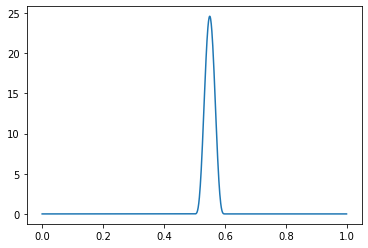

In [91]:
X = np.arange(0,1,0.001)
Y = beta.pdf(X,loc = 0.5 ,scale = 0.1, a = 5, b = 5)
plt.plot(X,Y)

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'int'

In [92]:
lognorm == lognorm

True